# Proposition 3.5

### Quaternionic Circulant and Quaternionic Fourier Matrices (alternate ipynb file, with other tests)

In [2]:
import numpy as np 
from quaternion_circulant_matrix import quaternionic_circulant_filter
from quaternion_matrix import quatmatmul_matrix_by_vector, eigdecomposition
from quaternion_circulant_matrix import create_qft_matrix
from quaternion_symplectic import qfft, vis, get_modulus_phase_axis
from quaternion_symplectic import qfft_right
np.set_printoptions(precision=2, suppress=True)  # for compact output
import quaternion

For any $C \in H^{N \times N}$ that is circulant, and any pure unit $\mu \in H$,

* Any column $k=1..N$ of the inverse QFT matrix $Q^{-\mu}_N$ is an eigenvector of $C$.
Column $k$ corresponds to the $k^{th}$ component of the vector of \emph{left} eigenvalues $\lambda^\mu$ = $[\lambda_1^\mu \lambda_2^\mu \cdots \lambda_N^\mu]^{T} \in H^{N}$.
Vector $\lambda^\mu$ is equal to the (asymmetric) *right* QFT $F^{\mu}_{R*}$ of the kernel of $C$.

Difference between Cx and λx is in total 4.579271462272076e-08 (in theory it must be zero).


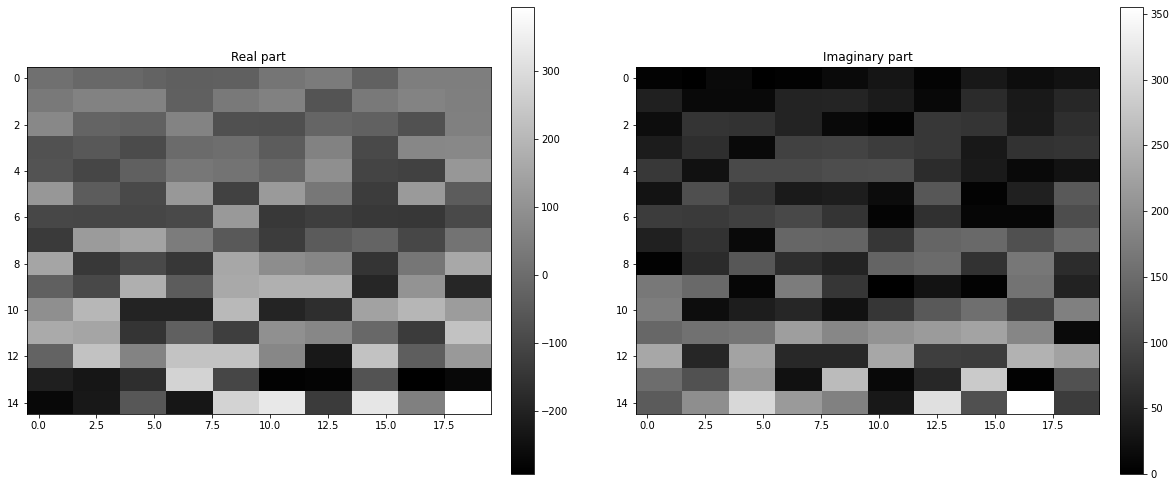

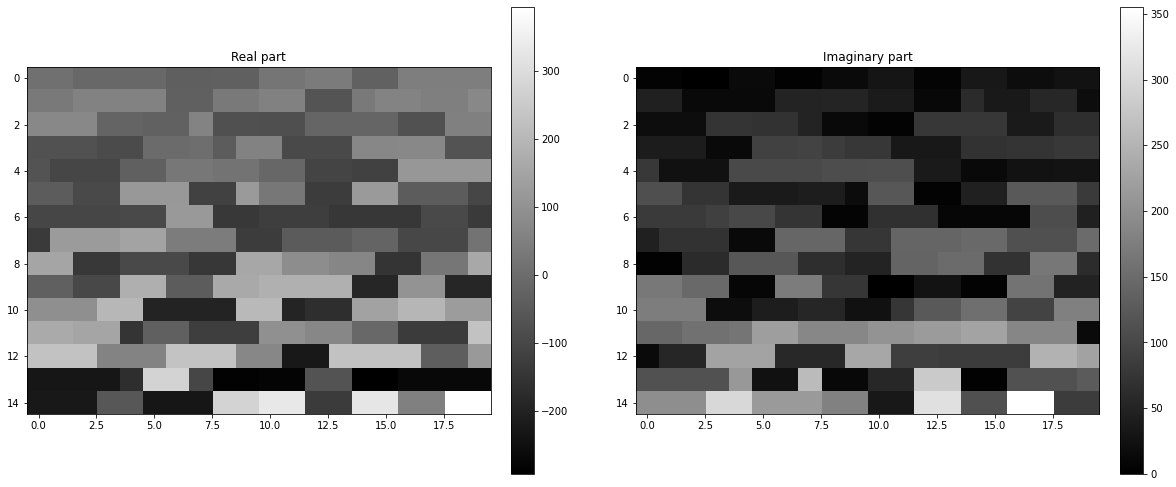

[[1.   0.71]
 [0.71 1.  ]]
[[1.   0.71]
 [0.71 1.  ]]


In [3]:
N = 300
alpha = 0
mykernel_float_realpart = np.zeros([N, 4])
mykernel_float_realpart[:, 0] = 10*np.random.randn(N, )
mykernel_float_imaginarypart = np.zeros([N, 4])
mykernel_float_imaginarypart[:, 1:] = 10*np.random.randn(N, 3)
mykernel = quaternion.as_quat_array(mykernel_float_realpart + alpha*mykernel_float_imaginarypart)
C = quaternionic_circulant_filter(mykernel)
#vis(C, visualization_style='channelwise')
N = len(mykernel)
mu = np.quaternion(0, 1, 0, 0).normalized()
Q = create_qft_matrix(N, axis= -mu )

lam = np.sqrt(N) * qfft_right(mykernel, qft_axis=mu, apply_shift=False)
lam_left_minusmu = np.sqrt(N) * qfft(mykernel, qft_axis=-mu, apply_shift=False) #experimenting
shouldbe_zerosum = 0
for i in range(N):
    column_1 = Q[:, i]
    # Compare Cx against λx 
    tt_1 = quatmatmul_matrix_by_vector(C, column_1)
    tt_2 = lam[i] * column_1 #ie, lam[i] is a *left* eigenvalue
    tt_right = column_1 * lam[i]
    shouldbe_zerosum += np.sum(np.abs(tt_1-tt_2))

print('Difference between Cx and λx is in total {} (in theory it must be zero).'.format(shouldbe_zerosum))
lam_asimage = np.reshape(lam, [N//20, 20])
lam_left_minusmu_asimage = np.reshape(lam_left_minusmu, [N//20, 20])
#vis(lam_asimage, visualization_style='channelwise')
#vis(lam_left_minusmu_asimage, visualization_style='channelwise')
lam_modulus, _, _ = get_modulus_phase_axis(lam)
lam_sorting_indices = np.argsort(lam_modulus)
lamsorted = lam[lam_sorting_indices]
lamsorted_asimage = np.reshape(lamsorted, [N//20, 20])
###########################
L, _ = eigdecomposition(C, is_hermitian=False)
Lquat = np.zeros([N,], dtype=np.quaternion)
for i in range(N):
    Lquat[i] = np.quaternion(np.real(L[i]), np.imag(L[i]), 0, 0)
#L_asimage = np.reshape(Lquat, [N//20, 20])
L_modulus, _, _ = get_modulus_phase_axis(Lquat)
L_sorting_indices = np.argsort(L_modulus)
Lsorted = Lquat[L_sorting_indices]
Lsorted_asimage = np.reshape(Lsorted, [N//20, 20])
vis(lamsorted_asimage, visualization_style='standardcomplex')
vis(Lsorted_asimage, visualization_style='standardcomplex')
## Check correlation ceoffient for lam / L
c1, c2, _ = get_modulus_phase_axis(lamsorted_asimage, return_standard_complex_number=True)
d1, d2, _ = get_modulus_phase_axis(Lsorted_asimage, return_standard_complex_number=True)
print(np.corrcoef(c1.flatten(), d1.flatten()))
print(np.corrcoef(c2.flatten(), d2.flatten()))
#




'''
A = quaternion.as_float_array(lamsorted_asimage)
B = quaternion.as_float_array(Lsorted_asimage)
Aimnorm = np.sqrt(A[...,1]**2 + A[...,2]**2 + A[...,3]**2)
Bimnorm = np.sqrt(B[...,1]**2 + B[...,2]**2 + B[...,3]**2)
##
##xx = np.sum(np.abs(quaternion.as_float_array(Lsorted_asimage) - quaternion.as_float_array(lamsorted_asimage)))
lam_mod, _, _ = get_modulus_phase_axis(lamsorted_asimage)
L_mod, _, _ = get_modulus_phase_axis(Lsorted_asimage)
from matplotlib import pyplot as plt
plt.imshow(lam_mod)
plt.show()
plt.imshow(L_mod)
plt.show()
plt.imshow(Aimnorm)
plt.show()
plt.imshow(Bimnorm)
plt.show()
print(np.sum(np.abs(lam_mod - L_mod)))
#print(lam_mod - L_mod)
'''

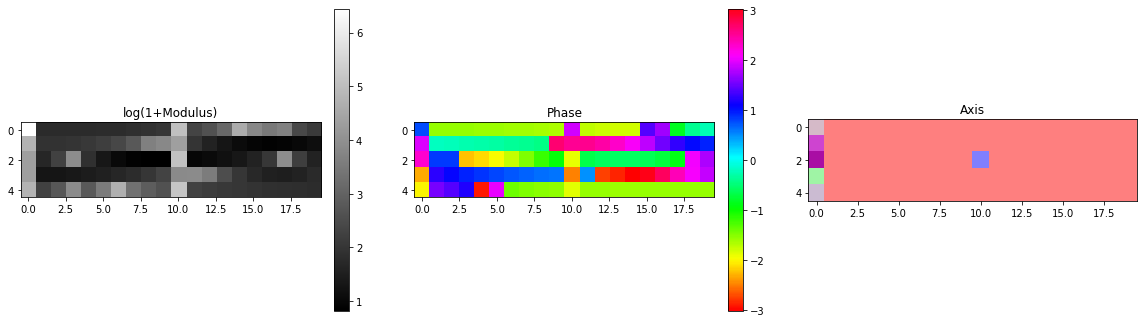

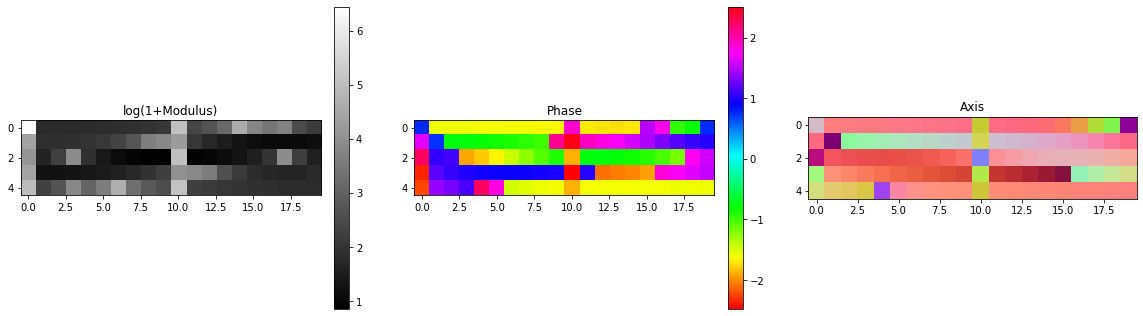

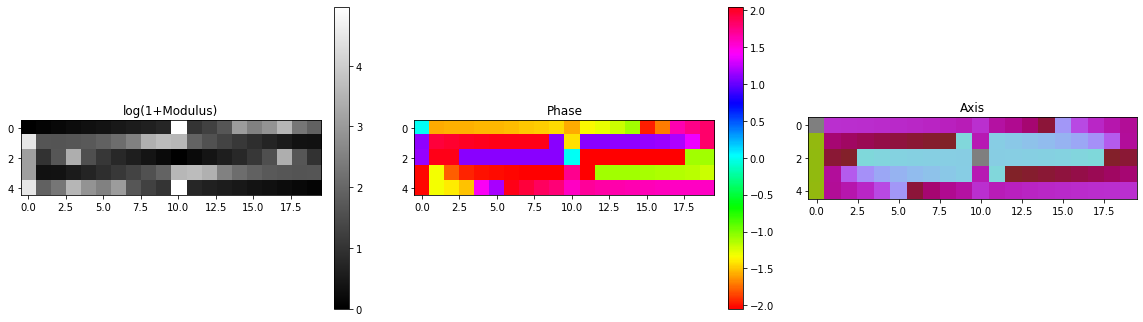

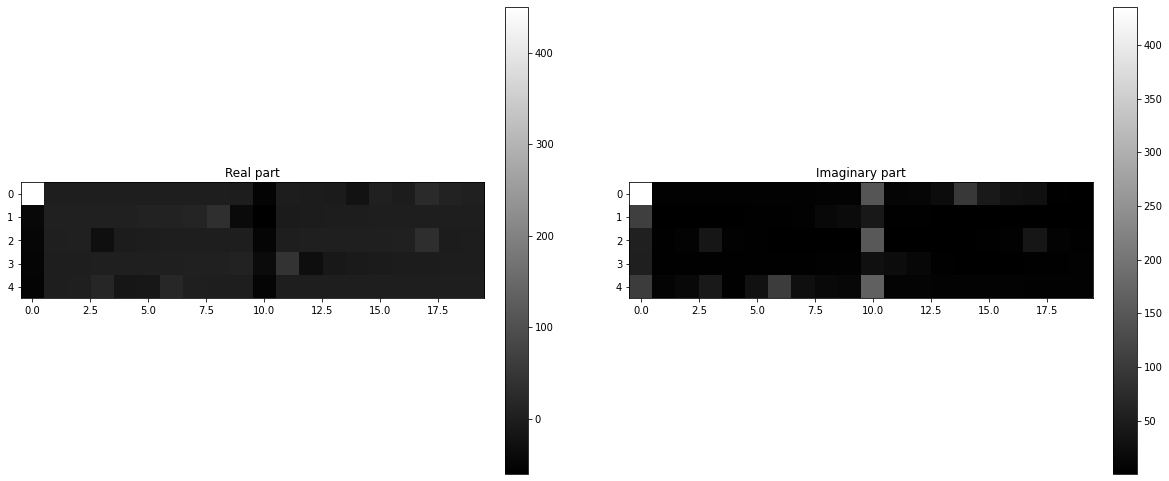

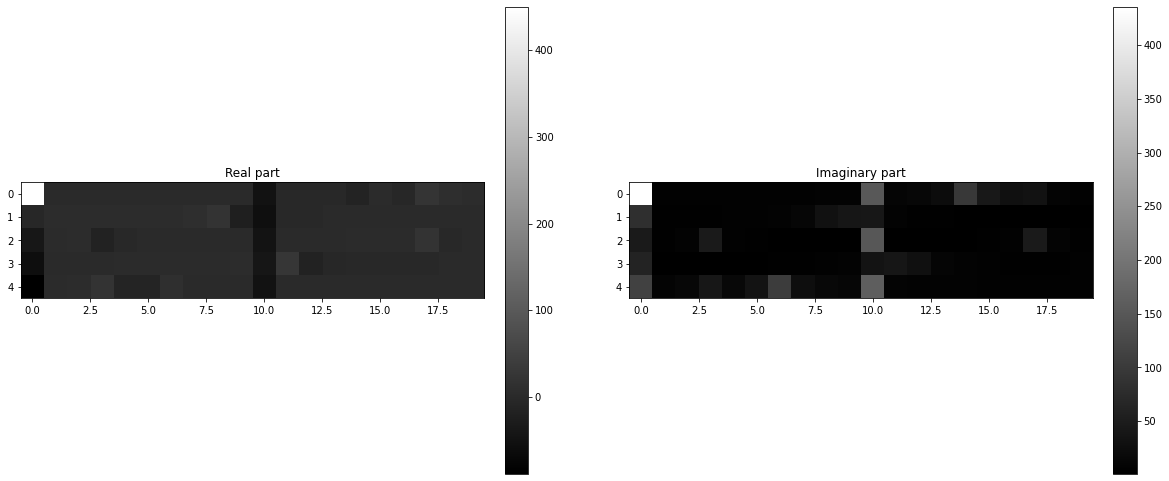

In [4]:
# If alpha is changed to a positive value, the two obtained eigenvalue sets are not identical (observe the colorbar value range), 
# though results show that they must somehow be correlated to one another
N = 100
alpha = 1
mykernel_float_realpart = np.zeros([N, 4])
mykernel_float_imaginarypart = np.zeros([N, 4])
for i in range(N):
    mykernel_float_realpart[i, 0] = i % 10 + np.cos(i*np.pi/3)
    mykernel_float_imaginarypart[i, 1:] = [i % 7 + np.tan(i*np.pi), -i % 5, 3*(i%2)+1]
mykernel = quaternion.as_quat_array(mykernel_float_realpart + alpha*mykernel_float_imaginarypart)
C = quaternionic_circulant_filter(mykernel)
#vis(C, visualization_style='channelwise')
N = len(mykernel)
mu = np.quaternion(0, 1, 0, 0).normalized()
nu = np.quaternion(0, 1, 1, -1).normalized()
lam = np.sqrt(N) * qfft_right(mykernel, qft_axis=mu, apply_shift=False)
lam_asimage = np.reshape(lam, [N//20, 20])
#_ = vis(lam_asimage, visualization_style='standardcomplex')
lam2 = np.sqrt(N) * qfft_right(mykernel, qft_axis=nu, apply_shift=False)
lam2_asimage = np.reshape(lam2, [N//20, 20])
_ = vis(lam_asimage)
_ = vis(lam2_asimage)
_ = vis(lam2_asimage - lam_asimage)
_ = vis(lam_asimage, visualization_style='standardcomplex')
_ = vis(lam2_asimage, visualization_style='standardcomplex')